#**1. Introduction**

According to the National Association of Realtors, of the 75% of contracts with settlement contingencies, 41% involved appraisal issues.

In addition, according to the Realtors Confidence Index Survey, 21% of realtors say appraisal issues delayed their sales contracts in October 2020. As a result, appraisal issues led to 13% of contracts being terminated. 

**Problem:** An inaccurate appraisal can lead to a cancelled sales contract and transaction delays because lenders won’t approve mortgages for more than the home’s value.

**Solution:** the solution will be to create a model that can accurately predict the estimated market value of each home and serve as a second opinion to compare with the appraiser's value.

This price estimate should help you protect against the appraiser’s mistake and obtain accurate home prices based on market data.  


---


# **2. Data**

The original dataset is called House Prices - Advanced Regression Techniques and was downloaded from Kaggle website: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv). 

The data contains variables describing the aspect of residential homes. It contains 11460 observations and 81 variables.

**Load the Dataset**

In [ ]:
# Import the relevant libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import tree
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the raw data from the source into a DataFrame

df = pd.read_csv("https://storage.googleapis.com/kagglesdsdata/competitions/5407/868283/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1616961321&Signature=dQXUDP%2FM9izz8c2q7PbgUO%2FwQqAigZQX3PTzapNSoMjvaz4E9Nfe8fikciXWSuiA7jqqZ0S8up%2Fe%2BoSkbW1vUyLdjrPFUdpHhsdujSV5Tm4MboI2bwE0eOFLM3afWdsVu4f1mi02D0YpCBQziqNUSBeTJWdVErVzNnFKafu2%2F9EMGd%2BgVDAT2vo3m9DKmFAveuBp0ui2vPdgUKrheuAuS2GtKN4B5IETE8o3XZdIkufBuJ8ruzwbiHfqVNe2Qr5%2F1LS7Tz1nKjeWvBnEwh61Q6DAJ1XxicR2tzWTLkyXifnVkGVucObszyYqnhkFVYCkiLZD5fNsYAZv4Qdfc3%2FOgA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv")

---

#**3. Methodology**

###**Data Cleaning**

In this step, I will eliminate any problems from the dataset which would prevent further analysis.

In [ ]:
# Use the info() function to get an understanding of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

It can be seen from the output that this dataset contains 1460 observations and 81 variables. 

There are some missing values. 

Moreover, 35 fields are integers, 43 are objects (strings) and 3 are float. The essential difference between these variable types is that continuous variables can take a potentially unlimited number of values, while categorical variables can take only a limited number of categories as their values.

In [ ]:
# Print the first 5 rows of the DataFrame

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Detecting Missing Values**

In [ ]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = df.isnull().sum()*100/df.isnull().count()

missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=["Total", "Percent"])

missing_data.head(25)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


It can be seen that 19 variables contain missing values.

**Handling Missing Values**

PoolQC, MiscFeature, Alley and Fence variables have 80% or more missing values. I will delete these variables from the dataset.

LotFrontage, GarageYrBlt and MasVnrArea are continuos variables (can take an unlimited number of different values). I will fill LotFrontage and MasVnrArea missing values with the mean and mode respectively (missing value imputation); and I will delete GarageYrBlt variable. 

For all categorical variables that contain missing values, I will replace their missing values with their most common category.  






In [ ]:
df.drop(["PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())

df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mode()[0])

df.drop(["GarageYrBlt"],axis=1,inplace=True)

df["FireplaceQu"] = df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0])

df["GarageCond"] = df["GarageCond"].fillna(df["GarageCond"].mode()[0])

df["GarageType"] = df["GarageType"].fillna(df["GarageType"].mode()[0])

df["GarageFinish"] = df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])

df["GarageQual"] = df["GarageQual"].fillna(df["GarageQual"].mode()[0])

df["BsmtExposure"] = df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0])

df["BsmtFinType2"] = df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0])

df["BsmtFinType1"] = df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0])

df["BsmtCond"] = df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])

df["BsmtQual"] = df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])

df["MasVnrType"] = df["MasVnrType"].fillna(df["MasVnrType"].mode()[0])

df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

df.drop(["Id"],axis=1,inplace=True)

In [ ]:
df.shape

(1460, 75)

In [ ]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = df.isnull().sum()*100/df.isnull().count()

missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=["Total", "Percent"])

missing_data.head(25)

,Total,Percent
SalePrice,0,0.0
YearRemodAdd,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


###**Data Exploration**

In this step, I will apply statistics and visualization techniques to gain a better understanding of the dataset.

In [ ]:
# Get univariate statistics to 
# summarize the central tendency, dispersion, 
# and shape of a dataset’s distribution

df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Identify numerical variables in the dataset

numeric_columns = df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
The number of numerical columns is 36


In [ ]:
# Identify non-numerical variables in the dataset

non_numeric_columns = df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
The number of non-numerical columns is 39


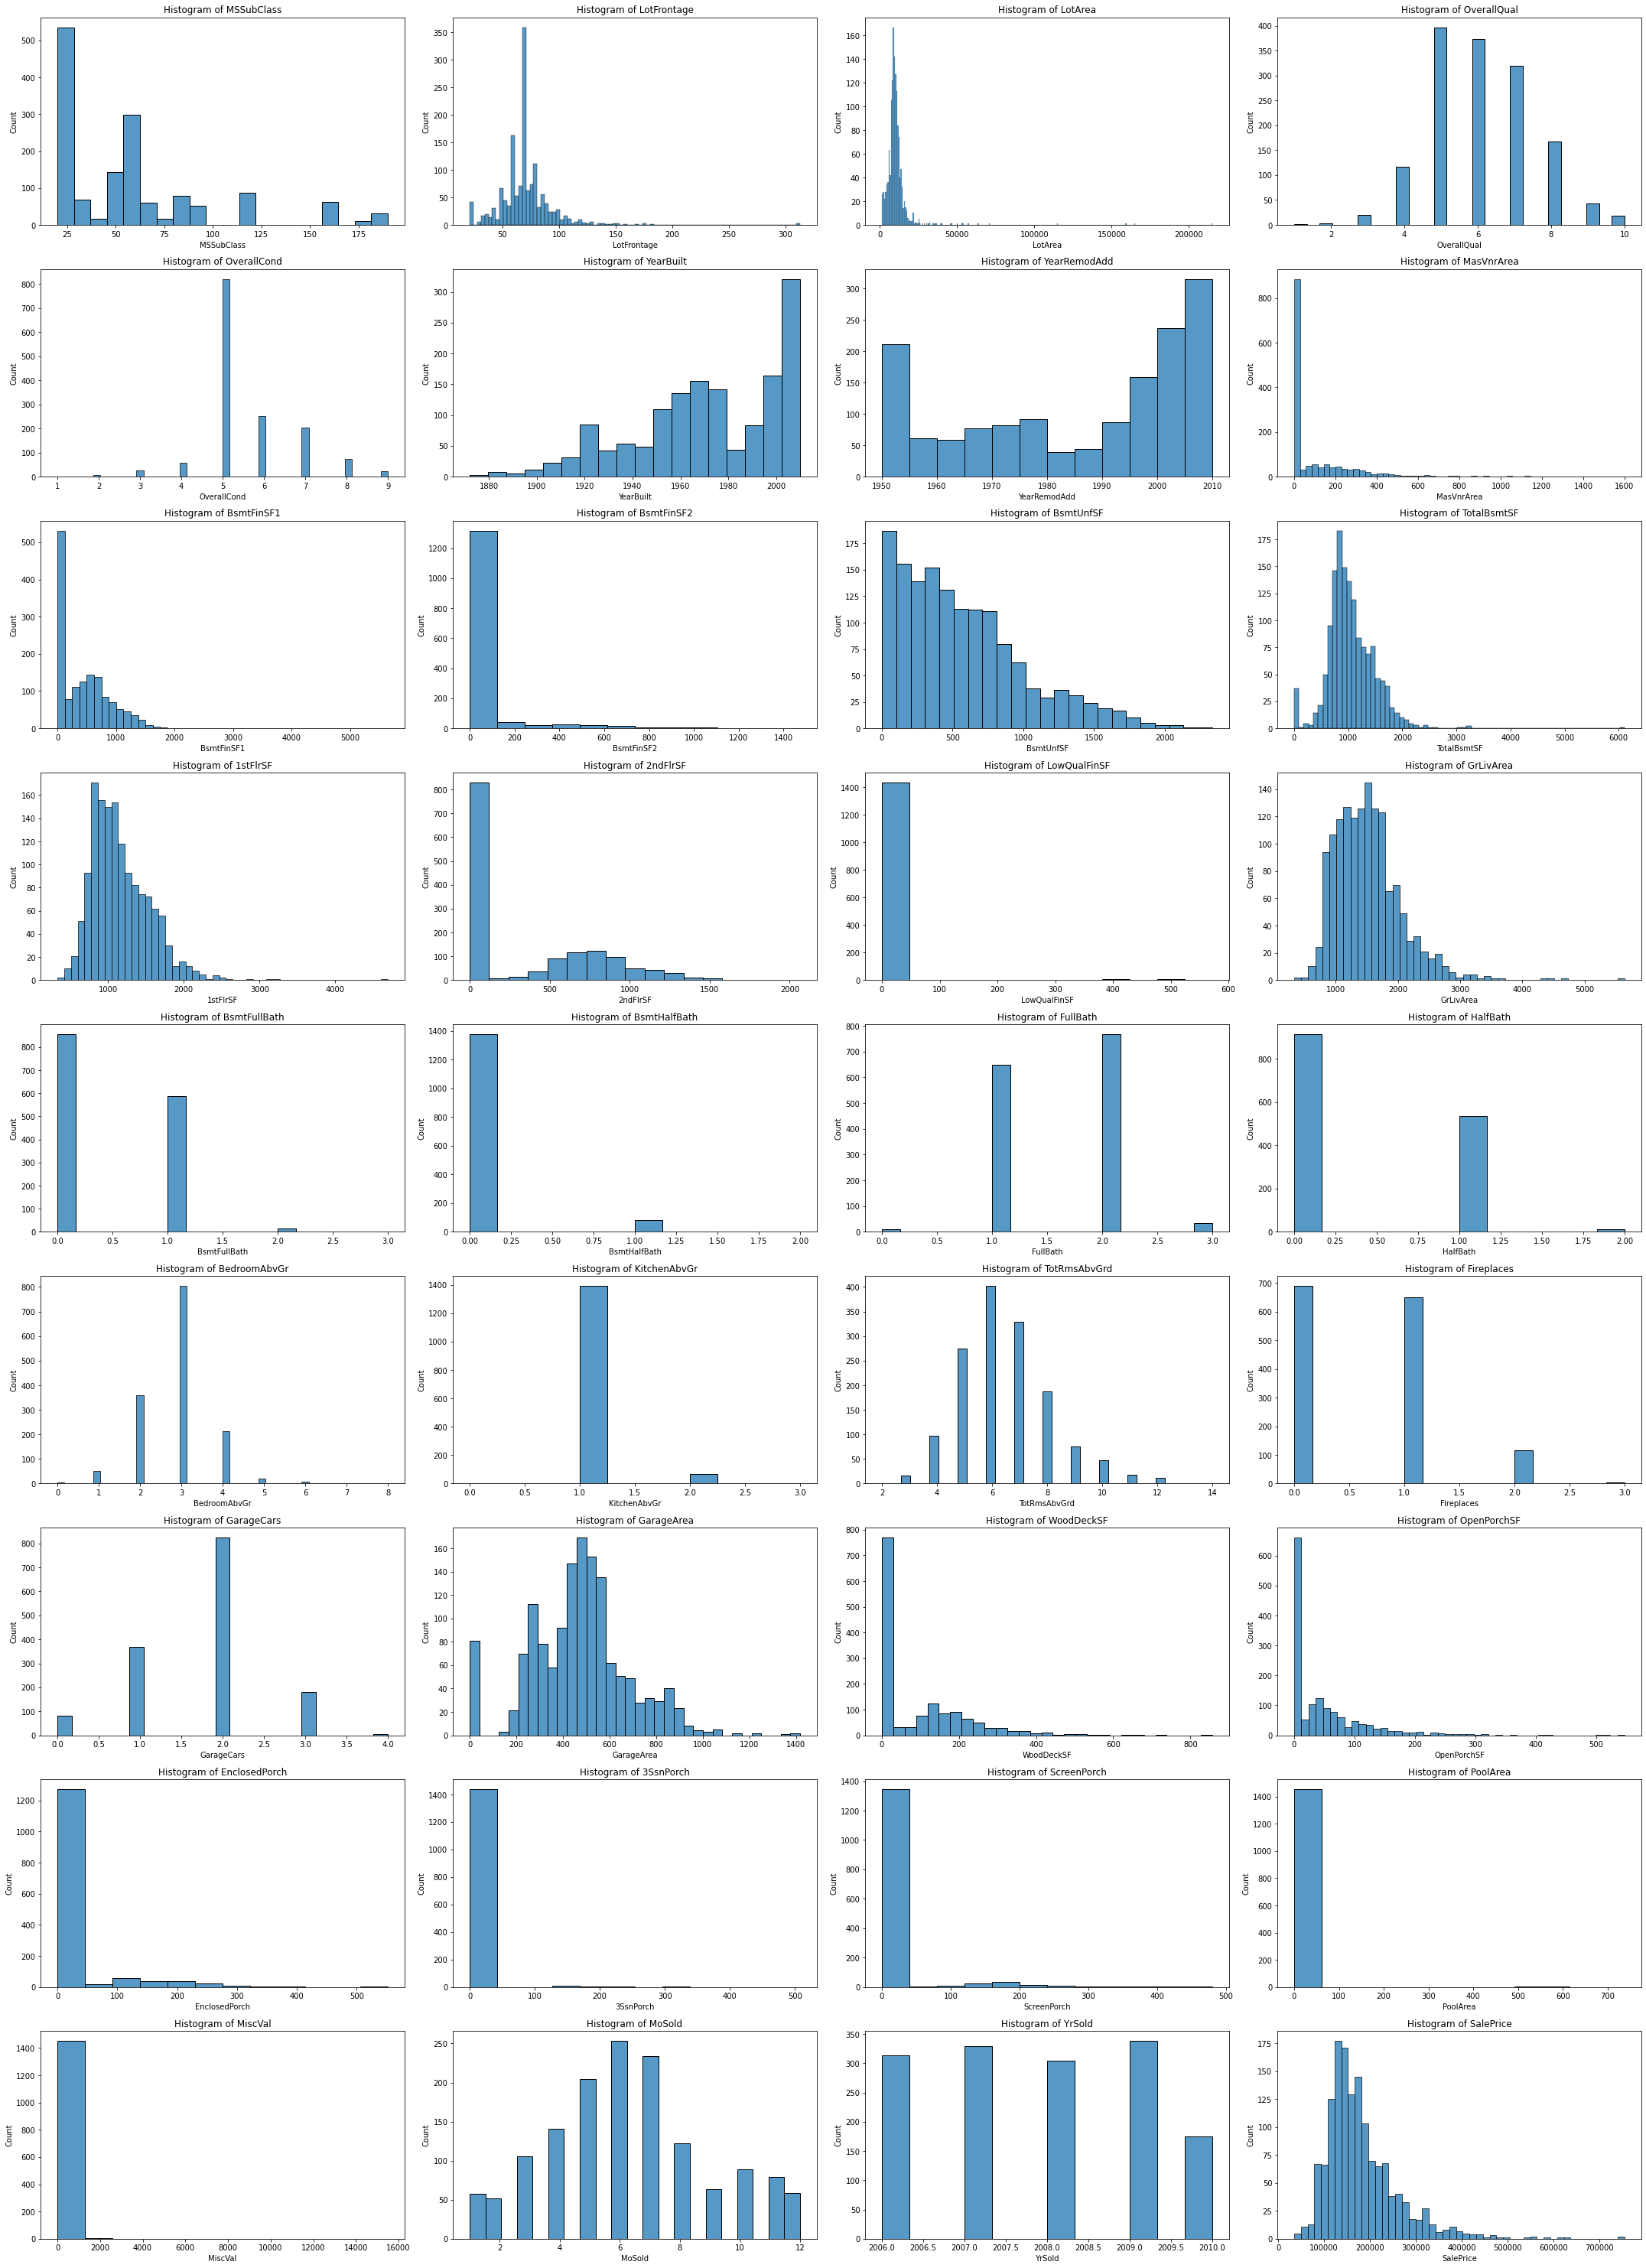

In [ ]:
# Univariate visualization of the continuous variables 
# to get a sense of their distribution

plt.figure(figsize=(30,50))

for index, column in enumerate(numeric_columns):
    plt.subplot(11,4,index+1)
    sns.histplot(df[column])
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

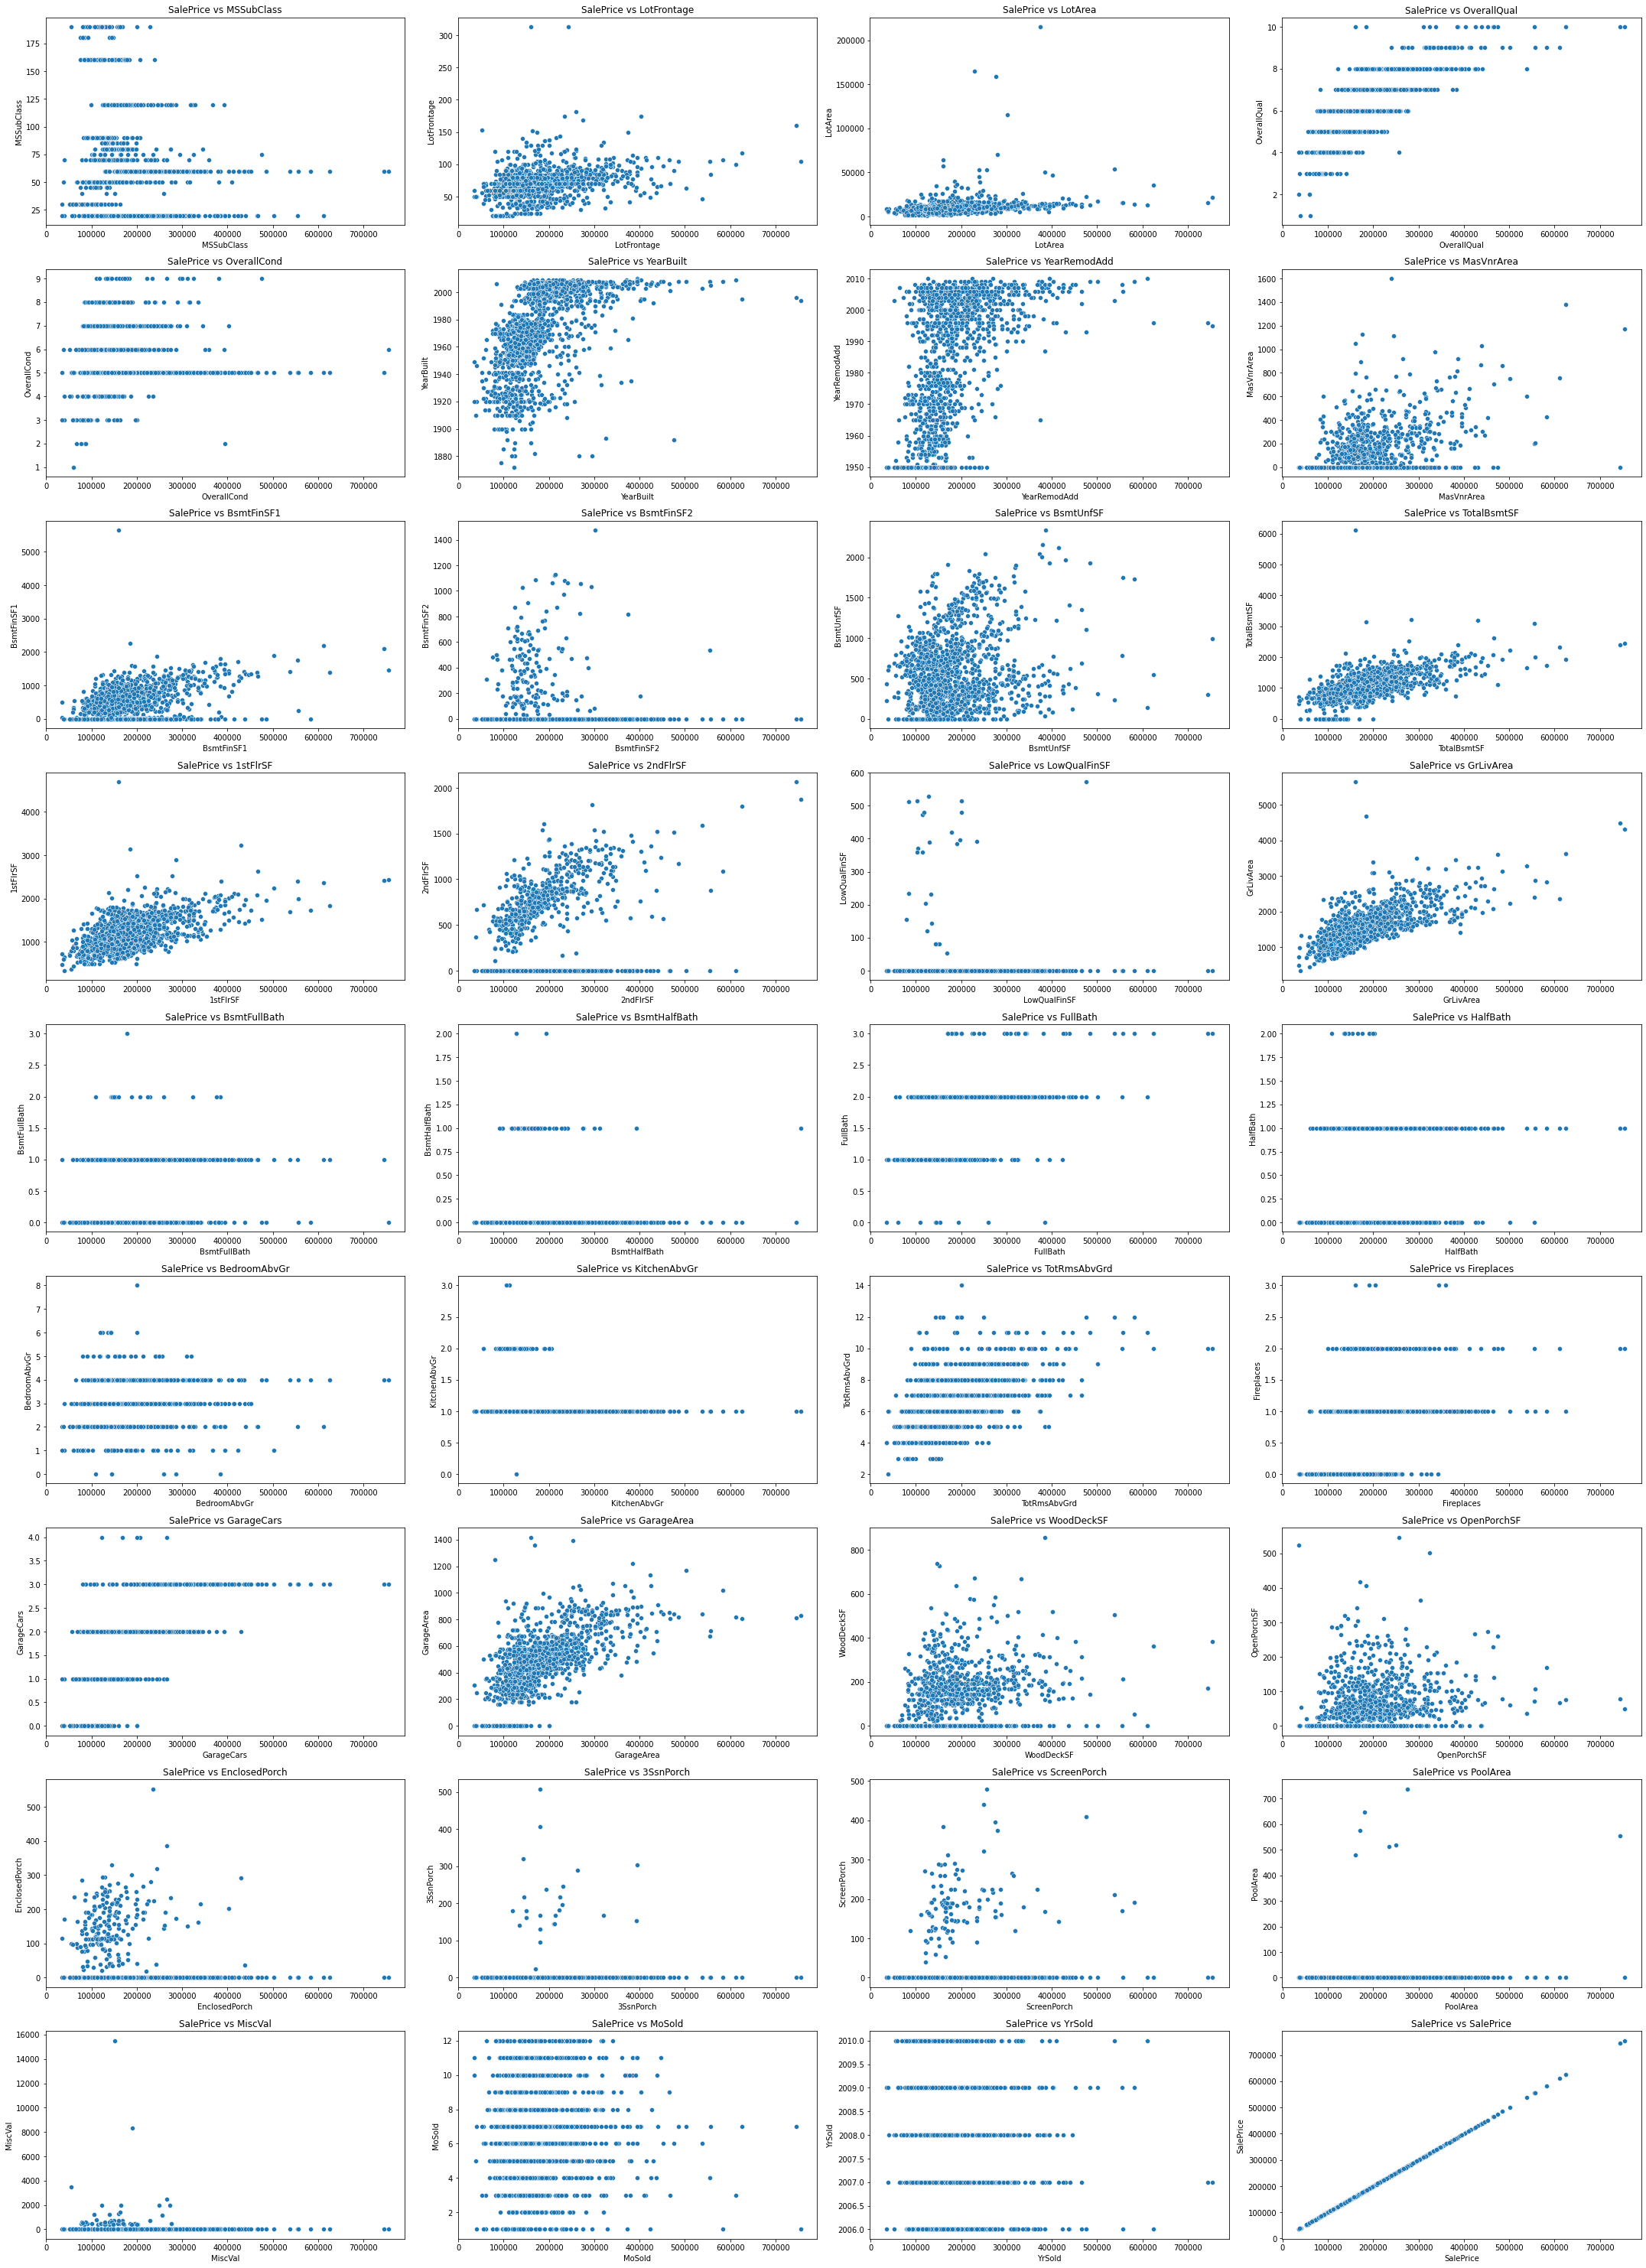

In [ ]:
# Multivariate analysis

# Bivariate analysis of two continuous variables

# Plot scatter plots to look at the relationship between the target variable 
# and the continuous variables (if the first variable's value usually goes up 
# when the second one goes up, then this indicates a positive relationship.)

plt.figure(figsize=(30,50))

for index, column in enumerate(numeric_columns):
    plt.subplot(11,4,index+1)
    sns.scatterplot(df["SalePrice"], df[column])
    plt.title("SalePrice vs {}".format(column))
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

OverallQual, 1stFlrSF, TotalBsmtSF, GrLivArea and GarageArea show a positive relationship with SalePrice. 

In [ ]:
# Apply the correlation coefficient to the continuous variables

# Get correlation matrix

df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178699,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


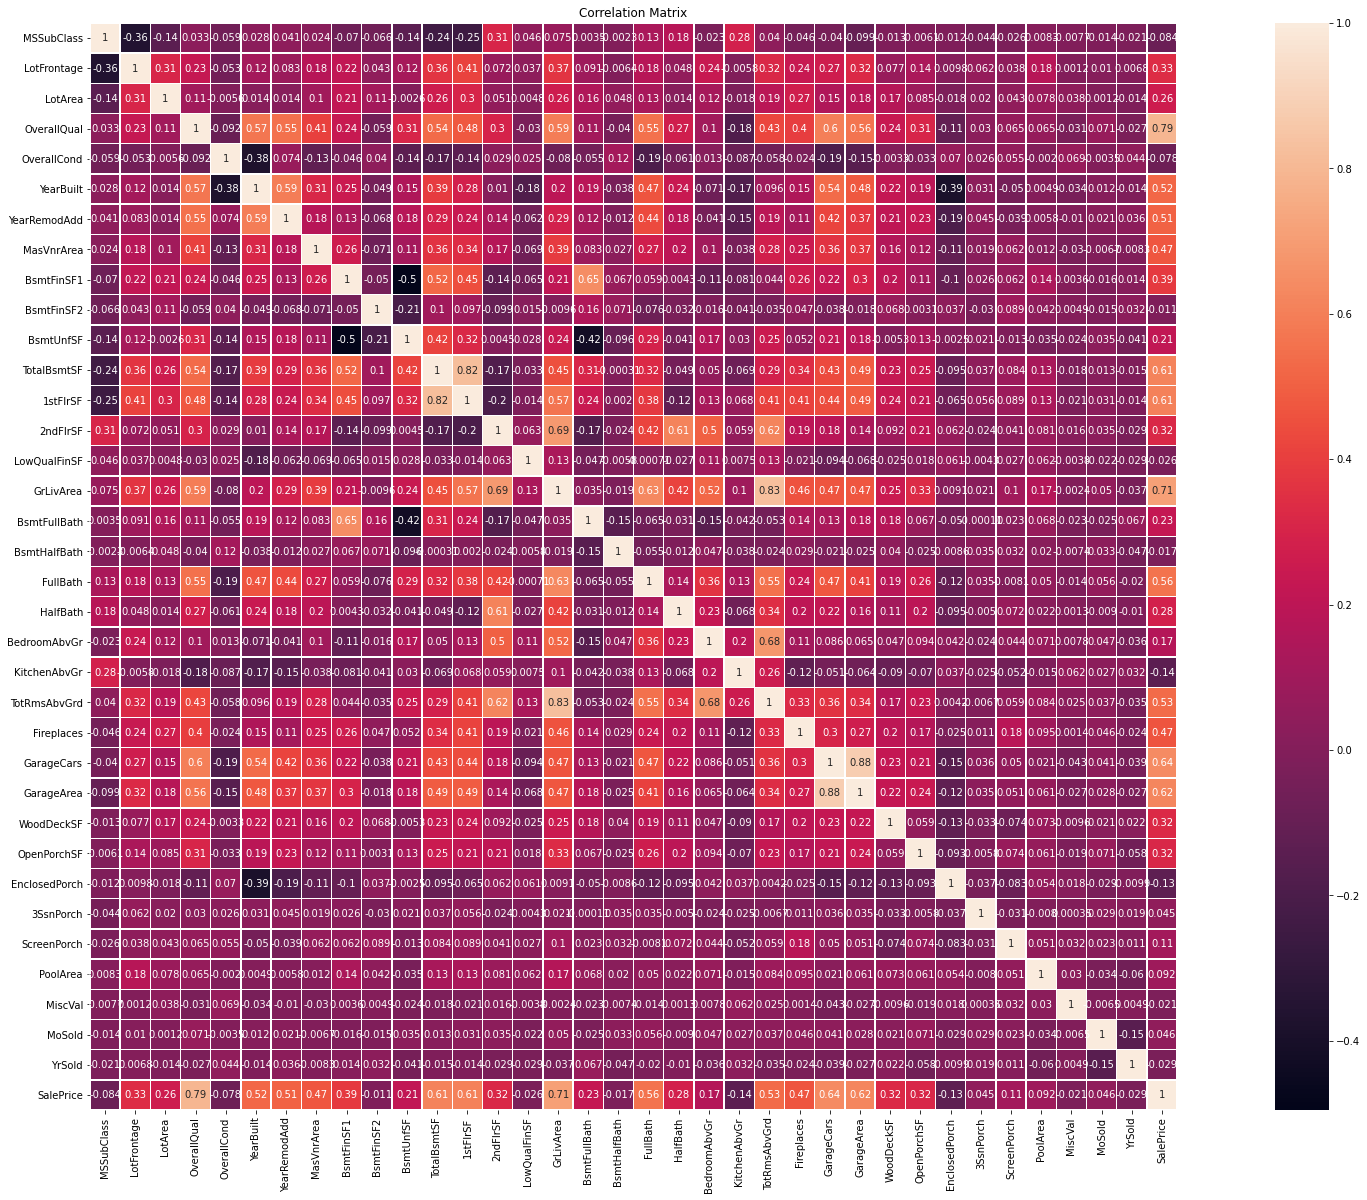

In [ ]:
# Draw heat map to look at the correlations between continuous variables

corrmat_df = df.corr()

import seaborn as sns

plt.figure(figsize=(35,20))

sns.heatmap(corrmat_df, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
np.abs(df[numeric_columns].iloc[:,1:].corr().loc[:,"SalePrice"]).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

The following are the 10 most correlated variables with SalePrice: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt and YearRemodAdd.  

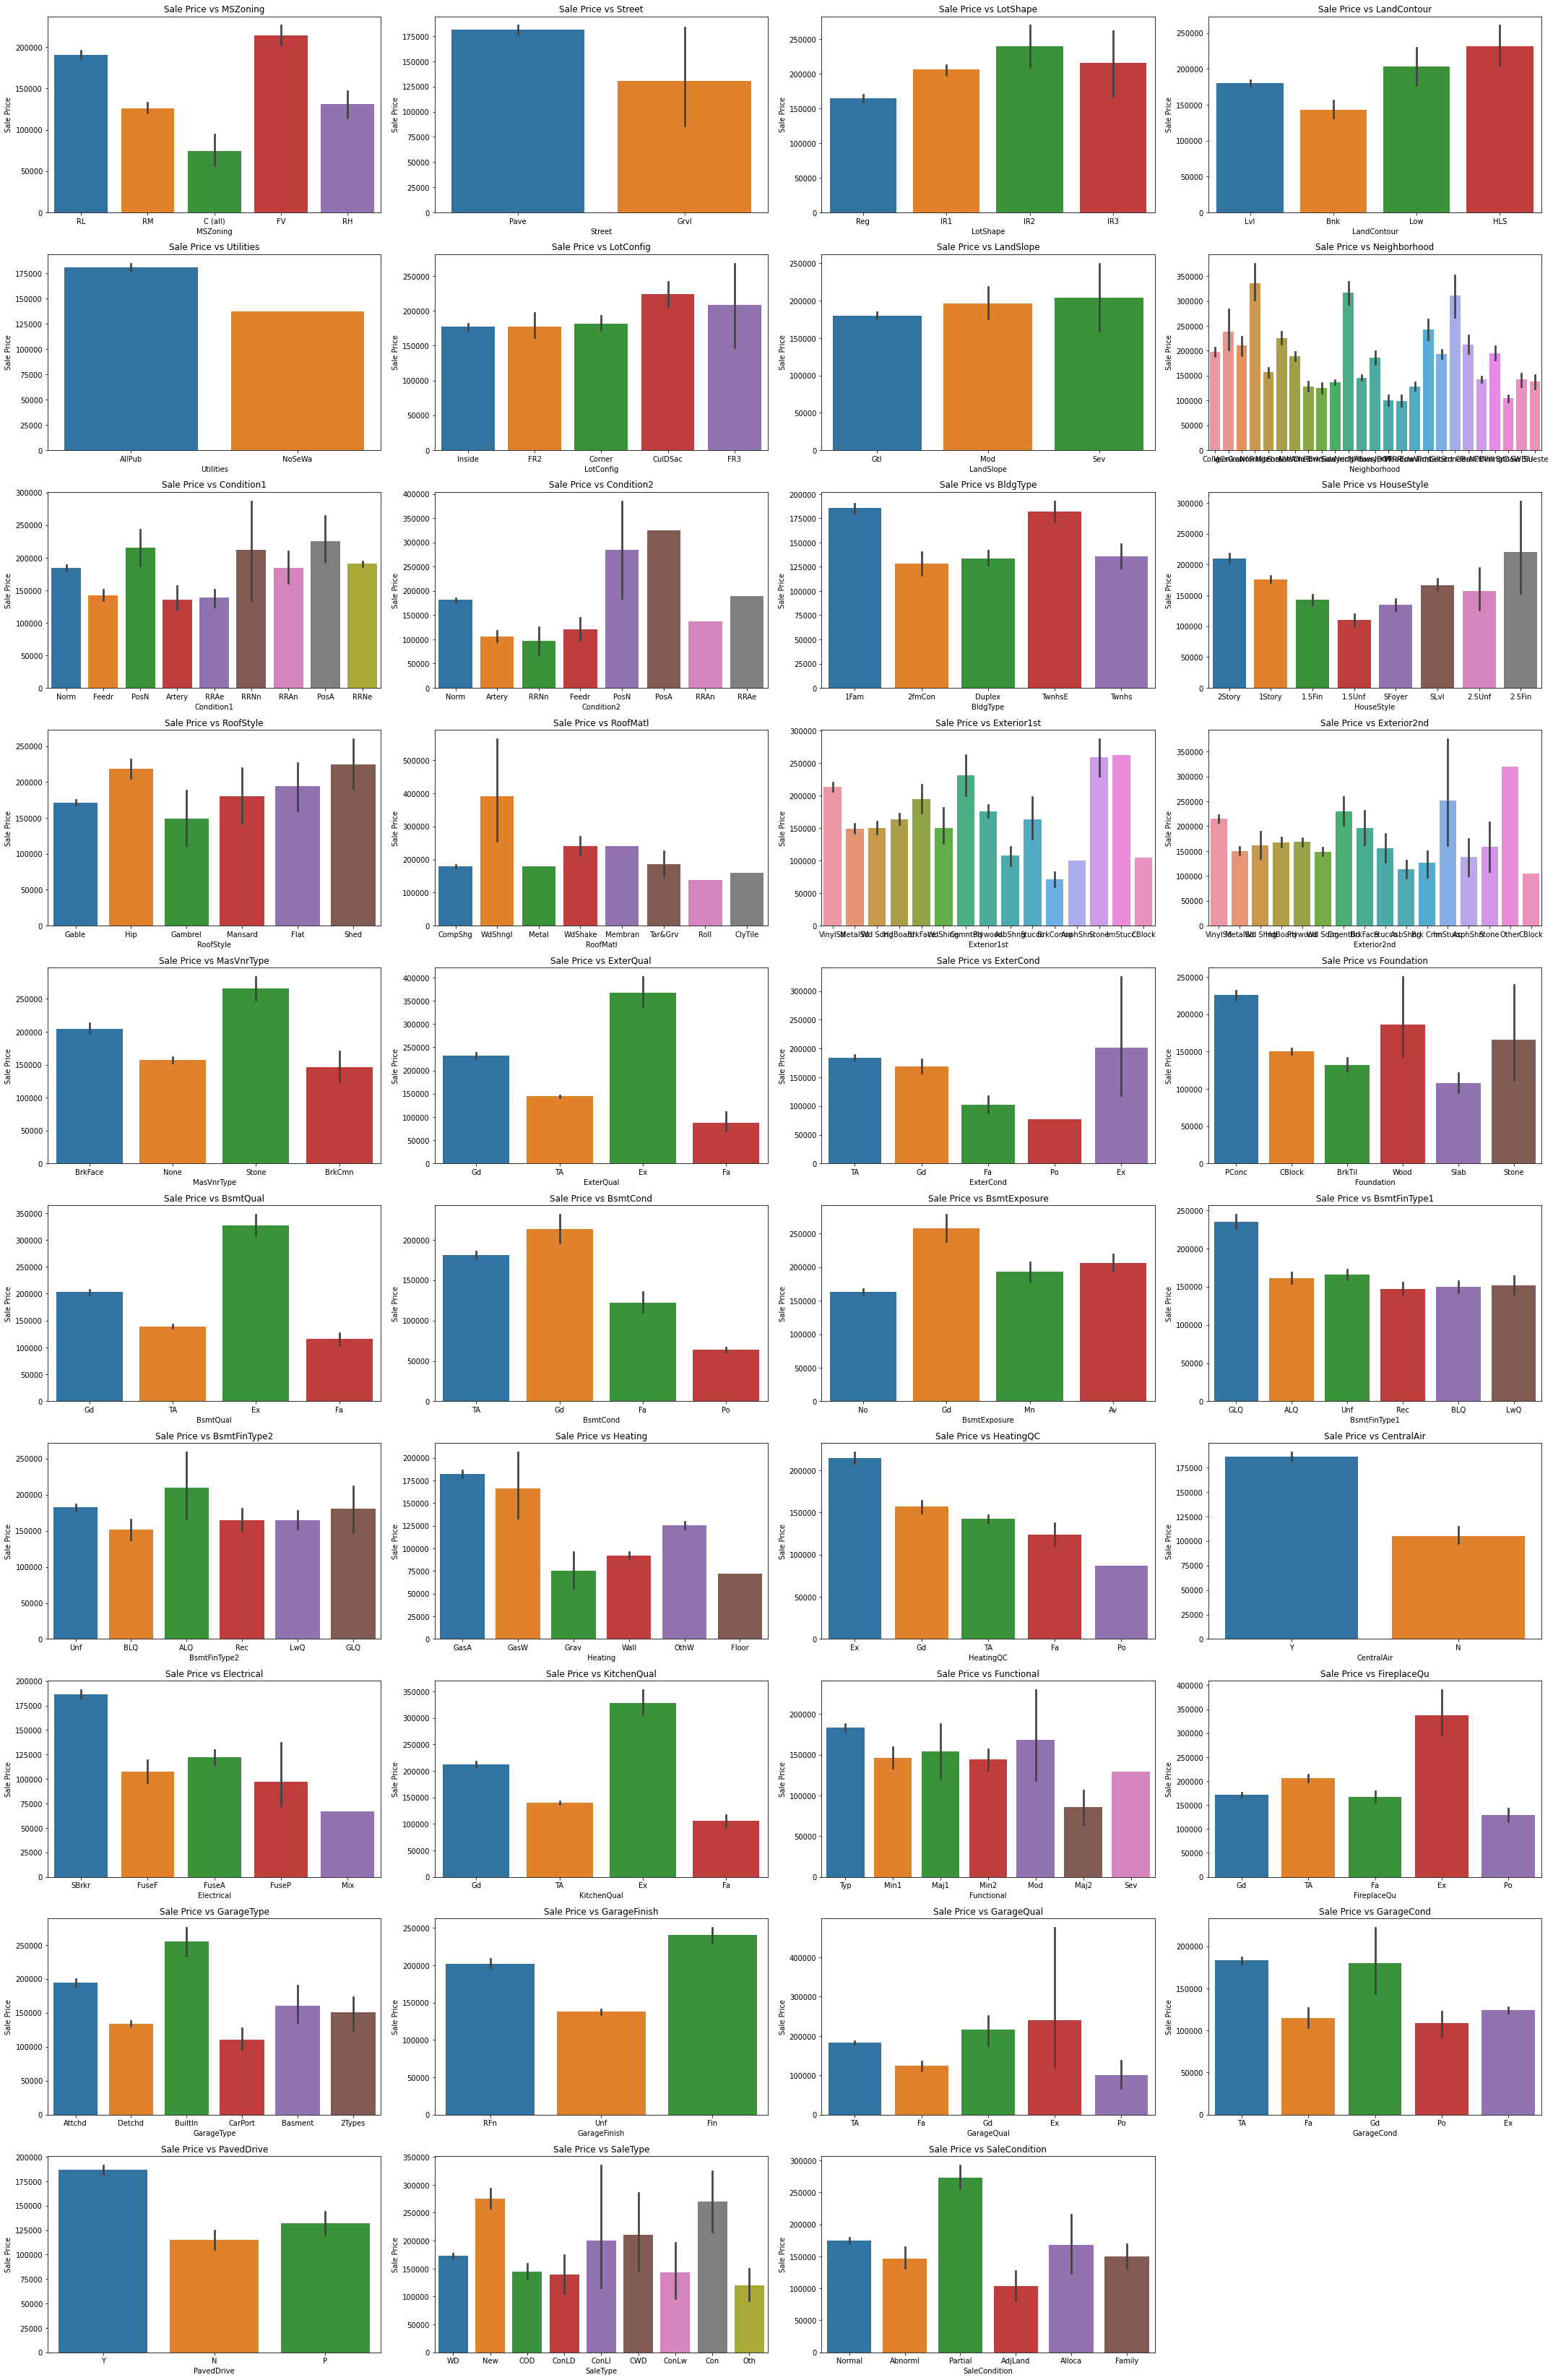

In [ ]:
# Visualize the target variable and categorical variables pairs

plt.figure(figsize=(30,50))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(11,4,index+1)

    sns.barplot(df[column], df["SalePrice"])
    plt.title("Sale Price vs {}".format(column))
    plt.ylabel("Sale Price")
    plt.xlabel(column)
    #plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

I will apply the ANOVA test to determine whether the categorical variables have some variance with respect to Sale Price.

In this case, the null hypothesis states that the features do not have a high difference/importance among each other while contributing the Sale Price. Thus, I will calculate the test statistic and p-value of each feature, and If we get a p-value less than 0.05 I will reject the null hypothesis.


In [ ]:
non_numeric_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
import scipy.stats

anova = {"feature":[], "f":[], "p":[]}

for i in non_numeric_columns:
  group_prices = []
  for group in df[i].unique():
      group_prices.append(df[df[i] == group]["SalePrice"].values)
  f, p = scipy.stats.f_oneway(*group_prices)
  anova["feature"].append(i)
  anova["f"].append(f)
  anova["p"].append(p)

anova = pd.DataFrame(anova)
anova = anova[["feature", "f", "p"]]
anova.sort_values("p", inplace=True)

anova


,feature,f,p
7,Neighborhood,71.784865,1.558600e-225
17,ExterQual,443.334831,1.439551e-204
20,BsmtQual,413.945648,2.078120e-194
29,KitchenQual,407.806352,3.032213e-192
33,GarageFinish,303.619407,5.993319e-111
19,Foundation,100.253851,5.791895e-91
26,HeatingQC,88.394462,2.667062e-67
23,BsmtFinType1,70.518425,3.598398e-66
16,MasVnrType,108.911305,1.279704e-63
32,GarageType,59.312957,2.578443e-56


The p-values of Street, LandSlope and Utilities are greater than 0.05; while the rest of the categorical variables have p-values less than 0.05 which means that these variables have some significance (variance) with respect to the Sale Price and the null hypothesis can be rejected.

###**Feature engineering**

In this final step of Exploratory Data Analysis (EDA), I will select the most useful features or create new features from the existing ones.

Furthermore, I will select the 10 categorical features that exhibit high variance with respect to the Sale Price: Neighborhood, ExterQual, BsmtQual, KitchenQual, GarageFinish, Foundation, HeatingQC, BsmtFinType1, MasVnrType, GarageType.  


**Feature Importance**

I will calculate the Feature Importance scores to select features based on how useful they are at predicting the target variable.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
# Define the dataset

# Y is the target variable

Y = np.log(df['SalePrice'])

# X is the feature set

X = df[numeric_columns].drop(["SalePrice"], axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

**Random Forest Regression Feature Importance**

In [ ]:
# Define the model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, Y)

# Get importance

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00356
Feature: 1, Score: 0.00828
Feature: 2, Score: 0.01638
Feature: 3, Score: 0.55006
Feature: 4, Score: 0.01703
Feature: 5, Score: 0.02841
Feature: 6, Score: 0.01472
Feature: 7, Score: 0.00360
Feature: 8, Score: 0.02435
Feature: 9, Score: 0.00062
Feature: 10, Score: 0.00794
Feature: 11, Score: 0.05462
Feature: 12, Score: 0.02538
Feature: 13, Score: 0.00824
Feature: 14, Score: 0.00029
Feature: 15, Score: 0.12164
Feature: 16, Score: 0.00188
Feature: 17, Score: 0.00046
Feature: 18, Score: 0.00118
Feature: 19, Score: 0.00118
Feature: 20, Score: 0.00242
Feature: 21, Score: 0.00215
Feature: 22, Score: 0.00335
Feature: 23, Score: 0.00693
Feature: 24, Score: 0.04362
Feature: 25, Score: 0.02876
Feature: 26, Score: 0.00441
Feature: 27, Score: 0.00648
Feature: 28, Score: 0.00318
Feature: 29, Score: 0.00023
Feature: 30, Score: 0.00059
Feature: 31, Score: 0.00008
Feature: 32, Score: 0.00063
Feature: 33, Score: 0.00492
Feature: 34, Score: 0.00244


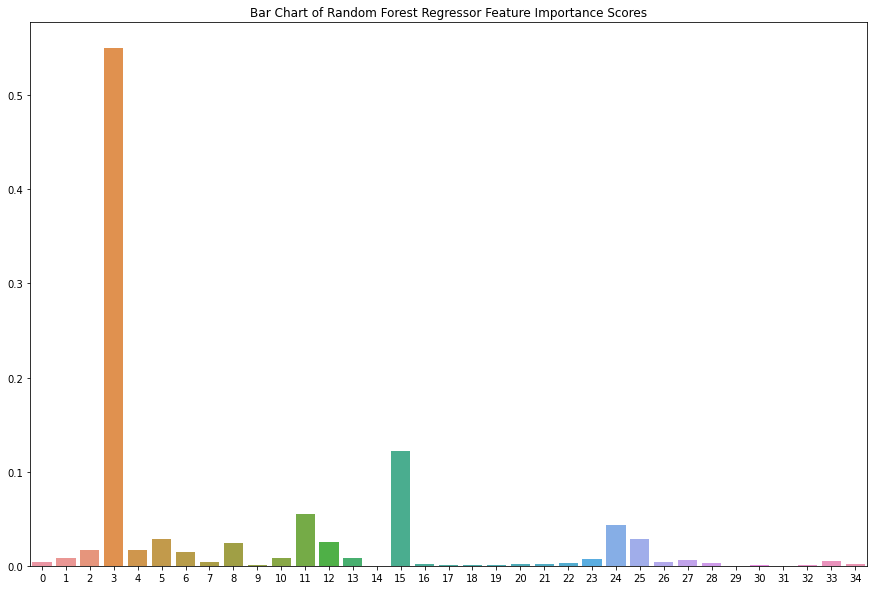

In [ ]:
# Plot feature importance

from matplotlib import pyplot

plt.figure(figsize=(15,10))

sns.barplot([x for x in range(len(importance))], importance)
plt.title("Bar Chart of Random Forest Regressor Feature Importance Scores")
plt.show()

**Gradient Boosting Regression Feature Importance**

In [ ]:
# Define the model

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X, Y)

# Get importance

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00069
Feature: 1, Score: 0.00335
Feature: 2, Score: 0.02057
Feature: 3, Score: 0.47633
Feature: 4, Score: 0.02160
Feature: 5, Score: 0.04529
Feature: 6, Score: 0.03478
Feature: 7, Score: 0.00012
Feature: 8, Score: 0.02588
Feature: 9, Score: 0.00055
Feature: 10, Score: 0.00104
Feature: 11, Score: 0.06185
Feature: 12, Score: 0.01574
Feature: 13, Score: 0.00407
Feature: 14, Score: 0.00017
Feature: 15, Score: 0.17805
Feature: 16, Score: 0.00244
Feature: 17, Score: 0.00008
Feature: 18, Score: 0.00537
Feature: 19, Score: 0.00447
Feature: 20, Score: 0.00010
Feature: 21, Score: 0.00161
Feature: 22, Score: 0.00007
Feature: 23, Score: 0.01853
Feature: 24, Score: 0.04761
Feature: 25, Score: 0.01775
Feature: 26, Score: 0.00206
Feature: 27, Score: 0.00537
Feature: 28, Score: 0.00094
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00175
Feature: 31, Score: 0.00071
Feature: 32, Score: 0.00009
Feature: 33, Score: 0.00044
Feature: 34, Score: 0.00056


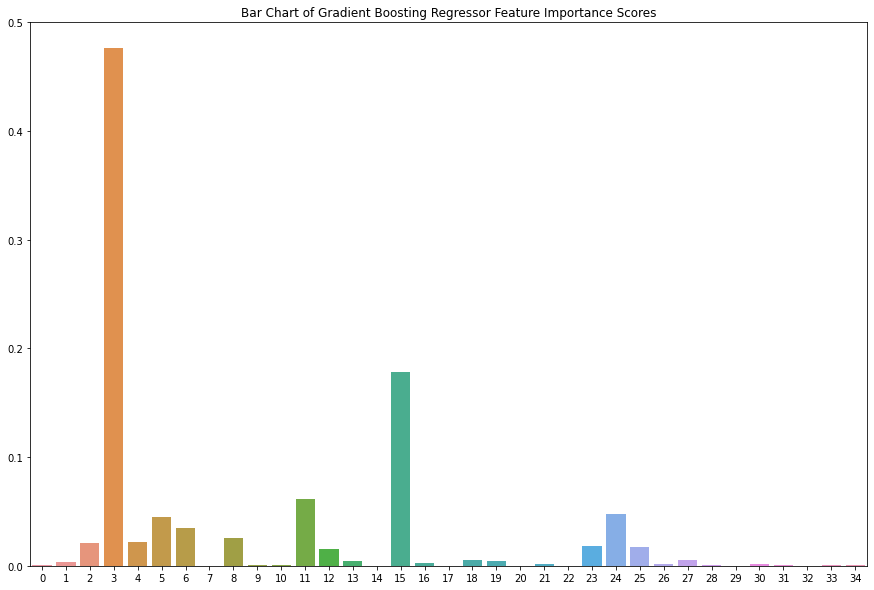

In [ ]:
# Plot feature importance

from matplotlib import pyplot

plt.figure(figsize=(15,10))

sns.barplot([x for x in range(len(importance))], importance)
plt.title("Bar Chart of Gradient Boosting Regressor Feature Importance Scores")
plt.show()

**Light Gradient Boosting Regression**

In [ ]:
# Define the model

from lightgbm import LGBMRegressor

model = LGBMRegressor()
model.fit(X, Y)

# Get importance

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 45.00000
Feature: 1, Score: 142.00000
Feature: 2, Score: 250.00000
Feature: 3, Score: 106.00000
Feature: 4, Score: 115.00000
Feature: 5, Score: 222.00000
Feature: 6, Score: 147.00000
Feature: 7, Score: 95.00000
Feature: 8, Score: 182.00000
Feature: 9, Score: 16.00000
Feature: 10, Score: 137.00000
Feature: 11, Score: 213.00000
Feature: 12, Score: 190.00000
Feature: 13, Score: 51.00000
Feature: 14, Score: 7.00000
Feature: 15, Score: 257.00000
Feature: 16, Score: 19.00000
Feature: 17, Score: 5.00000
Feature: 18, Score: 13.00000
Feature: 19, Score: 13.00000
Feature: 20, Score: 31.00000
Feature: 21, Score: 12.00000
Feature: 22, Score: 33.00000
Feature: 23, Score: 28.00000
Feature: 24, Score: 26.00000
Feature: 25, Score: 208.00000
Feature: 26, Score: 85.00000
Feature: 27, Score: 153.00000
Feature: 28, Score: 32.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 24.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 3.00000
Feature: 33, Score: 85.00000
Feature: 34, Sco

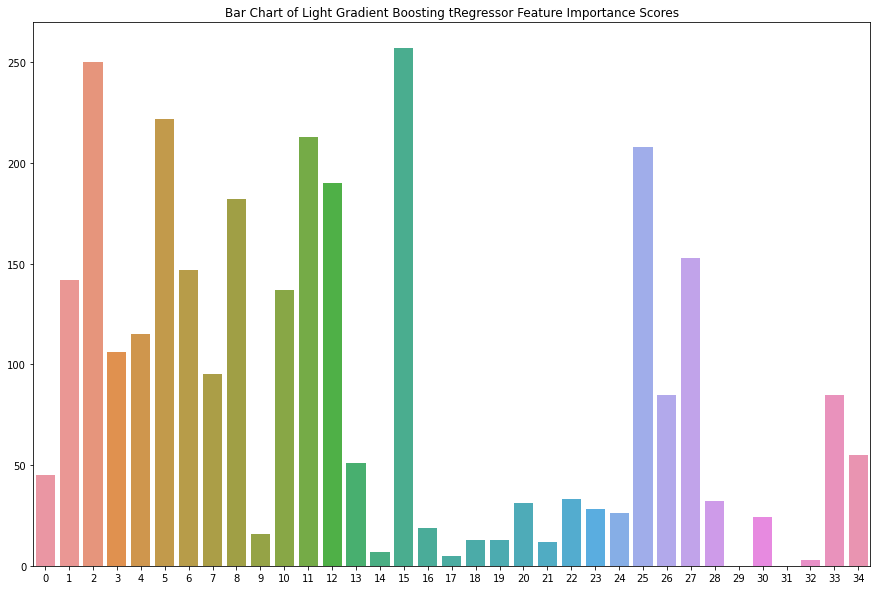

In [ ]:
# Plot feature importance

from matplotlib import pyplot

plt.figure(figsize=(15,10))

sns.barplot([x for x in range(len(importance))], importance)
plt.title("Bar Chart of Light Gradient Boosting tRegressor Feature Importance Scores")
plt.show()

**XGBoost Regression Feature Importance**

In [ ]:
# Define the model

from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X, Y)

# Get importance

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

[20:01:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.00676
Feature: 1, Score: 0.00878
Feature: 2, Score: 0.02334
Feature: 3, Score: 0.16151
Feature: 4, Score: 0.01592
Feature: 5, Score: 0.04064
Feature: 6, Score: 0.06603
Feature: 7, Score: 0.00271
Feature: 8, Score: 0.02093
Feature: 9, Score: 0.00247
Feature: 10, Score: 0.00783
Feature: 11, Score: 0.10203
Feature: 12, Score: 0.01293
Feature: 13, Score: 0.00717
Feature: 14, Score: 0.00279
Feature: 15, Score: 0.10008
Feature: 16, Score: 0.00917
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00868
Feature: 19, Score: 0.00913
Feature: 20, Score: 0.00430
Feature: 21, Score: 0.02788
Feature: 22, Score: 0.00788
Feature: 23, Score: 0.07401
Feature: 24, Score: 0.21610
Feature: 25, Score: 0.02254
Feature: 26, Score: 0.00906
Feature: 27, Score: 0.00589
Feature: 28, Score: 0.00457
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00778
Feature: 31, Sc

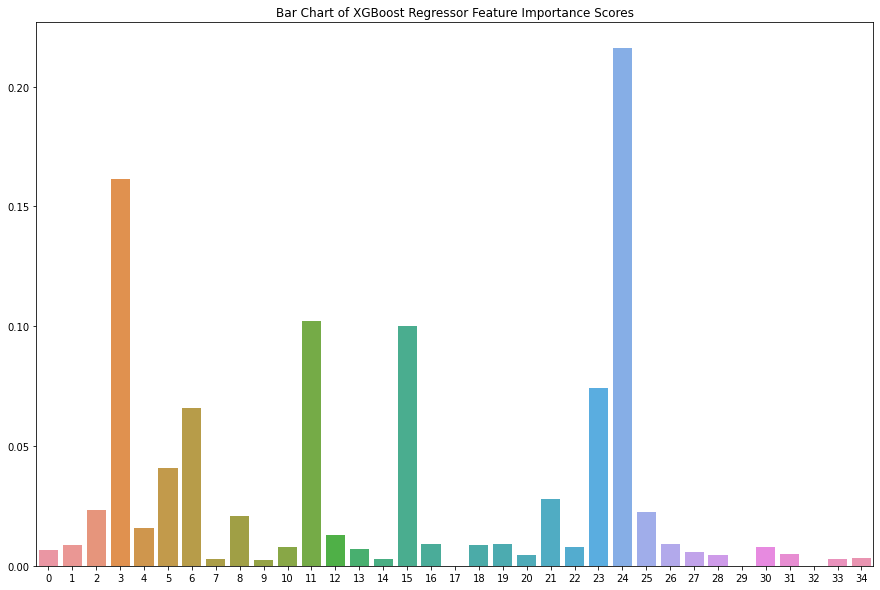

In [ ]:
# Plot feature importance

from matplotlib import pyplot

plt.figure(figsize=(15,10))

sns.barplot([x for x in range(len(importance))], importance)
plt.title("Bar Chart of XGBoost Regressor Feature Importance Scores")
plt.show()

The results above show that some of the features with high importance score also are higly correlated with the target variable.

I will select the numerical features that have a high feature importance score and at the same time are highly correlated with the Sale Price. 

Furthermore, I will select the 10 categorical features that exhibit high variance with respect to the Sale Price: Neighborhood, ExterQual, BsmtQual, KitchenQual, GarageFinish, Foundation, HeatingQC, BsmtFinType1, MasVnrType, GarageType. 

### **Modelling**

I will apply several machine learning tecniques to predict Sale Price and select the best performing model.

Sale Price is the target variable. It's a continuous outcome variable since it can take on an infinite range of values, therefore, we are dealing with a regression problem.

**Model Selection**

I will use cross-validation to select the best performing model. 

In [ ]:
# 10-fold cross-validation with Linear Regression

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

lr = LinearRegression() 

print(np.sqrt(-cross_val_score(lr, X, Y, cv=10, scoring='neg_mean_squared_error')).mean())

0.1525395835210059


In [ ]:
# 10-fold cross-validation with Ridge Regression

from sklearn.linear_model import Ridge

ridgeregr = Ridge() 

print(np.sqrt(-cross_val_score(ridgeregr, X, Y, cv=10, scoring='neg_mean_squared_error')).mean())

0.1525217601236779


In [ ]:
# 10-fold cross-validation with Lasso Regression

from sklearn.linear_model import Lasso

lassoregr = Lasso() 

print(np.sqrt(-cross_val_score(lassoregr, X, Y, cv=10, scoring='neg_mean_squared_error')).mean())

0.1944270137612845


In [ ]:
# 10-fold cross-validation with Elastic Net Regression

from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet() 

print(np.sqrt(-cross_val_score(elasticregr, X, Y, cv=10, scoring='neg_mean_squared_error')).mean())

0.18706176544279157


In [ ]:
# 10-fold cross-validation with Random Forest Regression

from sklearn.model_selection import cross_val_score

rfr = RandomForestRegressor()

print(np.sqrt(-cross_val_score(rfr, X, Y, cv=10, scoring='neg_mean_squared_error')).mean())

0.14488048932587927


In [ ]:
# 10-fold cross-validation with Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

print(np.sqrt(-cross_val_score(gbr, X, Y, cv=10, scoring='neg_mean_squared_error')).mean())

0.132219510071736


From the results it can be seen that Gradient Boosting Regression is the best model for our dataset.

In [ ]:
df_1 = df[["SalePrice",
           
           "LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "Fireplaces", "GarageCars", "GarageArea",
            
           "Neighborhood", "ExterQual", "BsmtQual", "KitchenQual", "GarageFinish", 
           "Foundation", "HeatingQC", "BsmtFinType1", "MasVnrType", "GarageType"]]

# df_1 = df[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", 
#           "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd", "SalePrice",
#
#           "LotArea", "OverallCond", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "Fireplaces", "GarageCars", "GarageArea",

#           "Neighborhood", "ExterQual", "BsmtQual", "KitchenQual", "GarageFinish", 
#           "Foundation", "HeatingQC", "BsmtFinType1", "MasVnrType", "GarageType"]]

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     1460 non-null   int64 
 1   LotArea       1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   YearBuilt     1460 non-null   int64 
 5   YearRemodAdd  1460 non-null   int64 
 6   BsmtFinSF1    1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   1stFlrSF      1460 non-null   int64 
 9   GrLivArea     1460 non-null   int64 
 10  Fireplaces    1460 non-null   int64 
 11  GarageCars    1460 non-null   int64 
 12  GarageArea    1460 non-null   int64 
 13  Neighborhood  1460 non-null   object
 14  ExterQual     1460 non-null   object
 15  BsmtQual      1460 non-null   object
 16  KitchenQual   1460 non-null   object
 17  GarageFinish  1460 non-null   object
 18  Foundation    1460 non-null   object
 19  Heatin

In [ ]:
df_1.head()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,Fireplaces,GarageCars,GarageArea,Neighborhood,ExterQual,BsmtQual,KitchenQual,GarageFinish,Foundation,HeatingQC,BsmtFinType1,MasVnrType,GarageType
0,208500,8450,7,5,2003,2003,706,856,856,1710,0,2,548,CollgCr,Gd,Gd,Gd,RFn,PConc,Ex,GLQ,BrkFace,Attchd
1,181500,9600,6,8,1976,1976,978,1262,1262,1262,1,2,460,Veenker,TA,Gd,TA,RFn,CBlock,Ex,ALQ,None,Attchd
2,223500,11250,7,5,2001,2002,486,920,920,1786,1,2,608,CollgCr,Gd,Gd,Gd,RFn,PConc,Ex,GLQ,BrkFace,Attchd
3,140000,9550,7,5,1915,1970,216,756,961,1717,1,3,642,Crawfor,TA,TA,Gd,Unf,BrkTil,Gd,ALQ,None,Detchd
4,250000,14260,8,5,2000,2000,655,1145,1145,2198,1,3,836,NoRidge,Gd,Gd,Gd,RFn,PConc,Ex,GLQ,BrkFace,Attchd


In [ ]:
# Identify numerical variables in the dataset

numeric_data = df_1.select_dtypes(['int64', 'float64']).columns
print(numeric_data)
print("The number of numerical columns is {}".format(len(numeric_data)))

Index(['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'Fireplaces', 'GarageCars', 'GarageArea'],
      dtype='object')
The number of numerical columns is 13


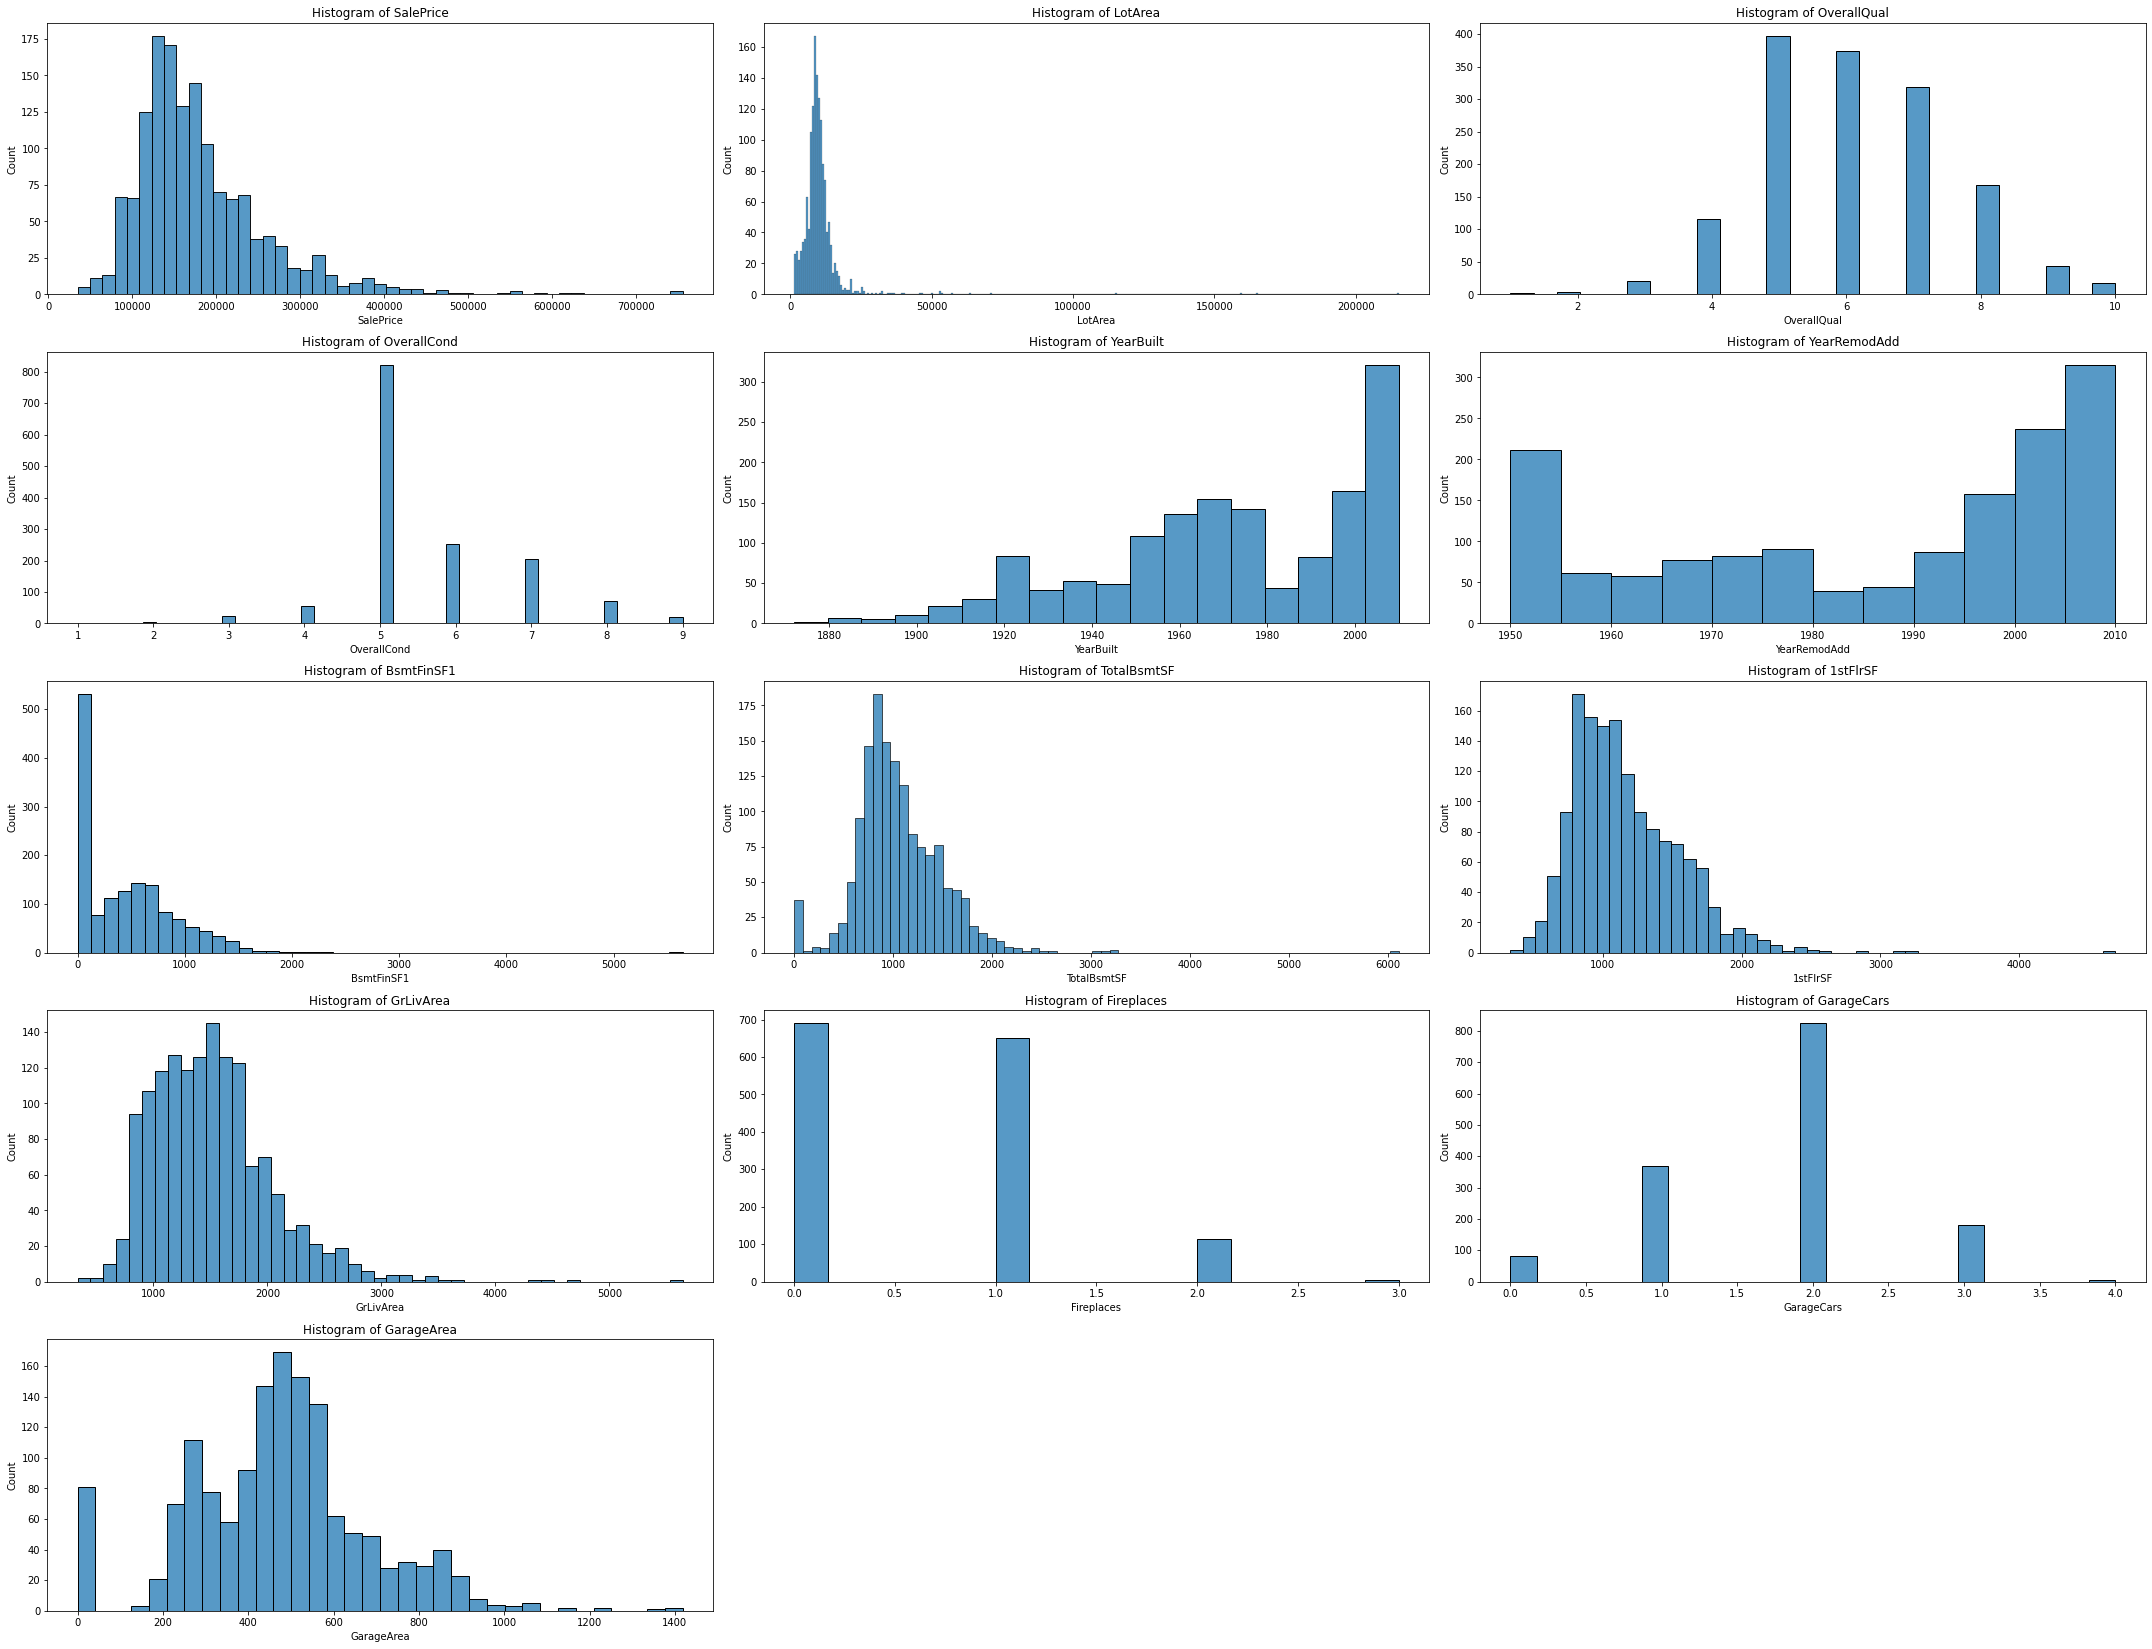

In [ ]:
# Univariate visualization of the continuous variables 
# to get a sense of their distribution

plt.figure(figsize=(30,50))

for index, column in enumerate(numeric_data):
    plt.subplot(11,3,index+1)
    sns.histplot(df_1[column])
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

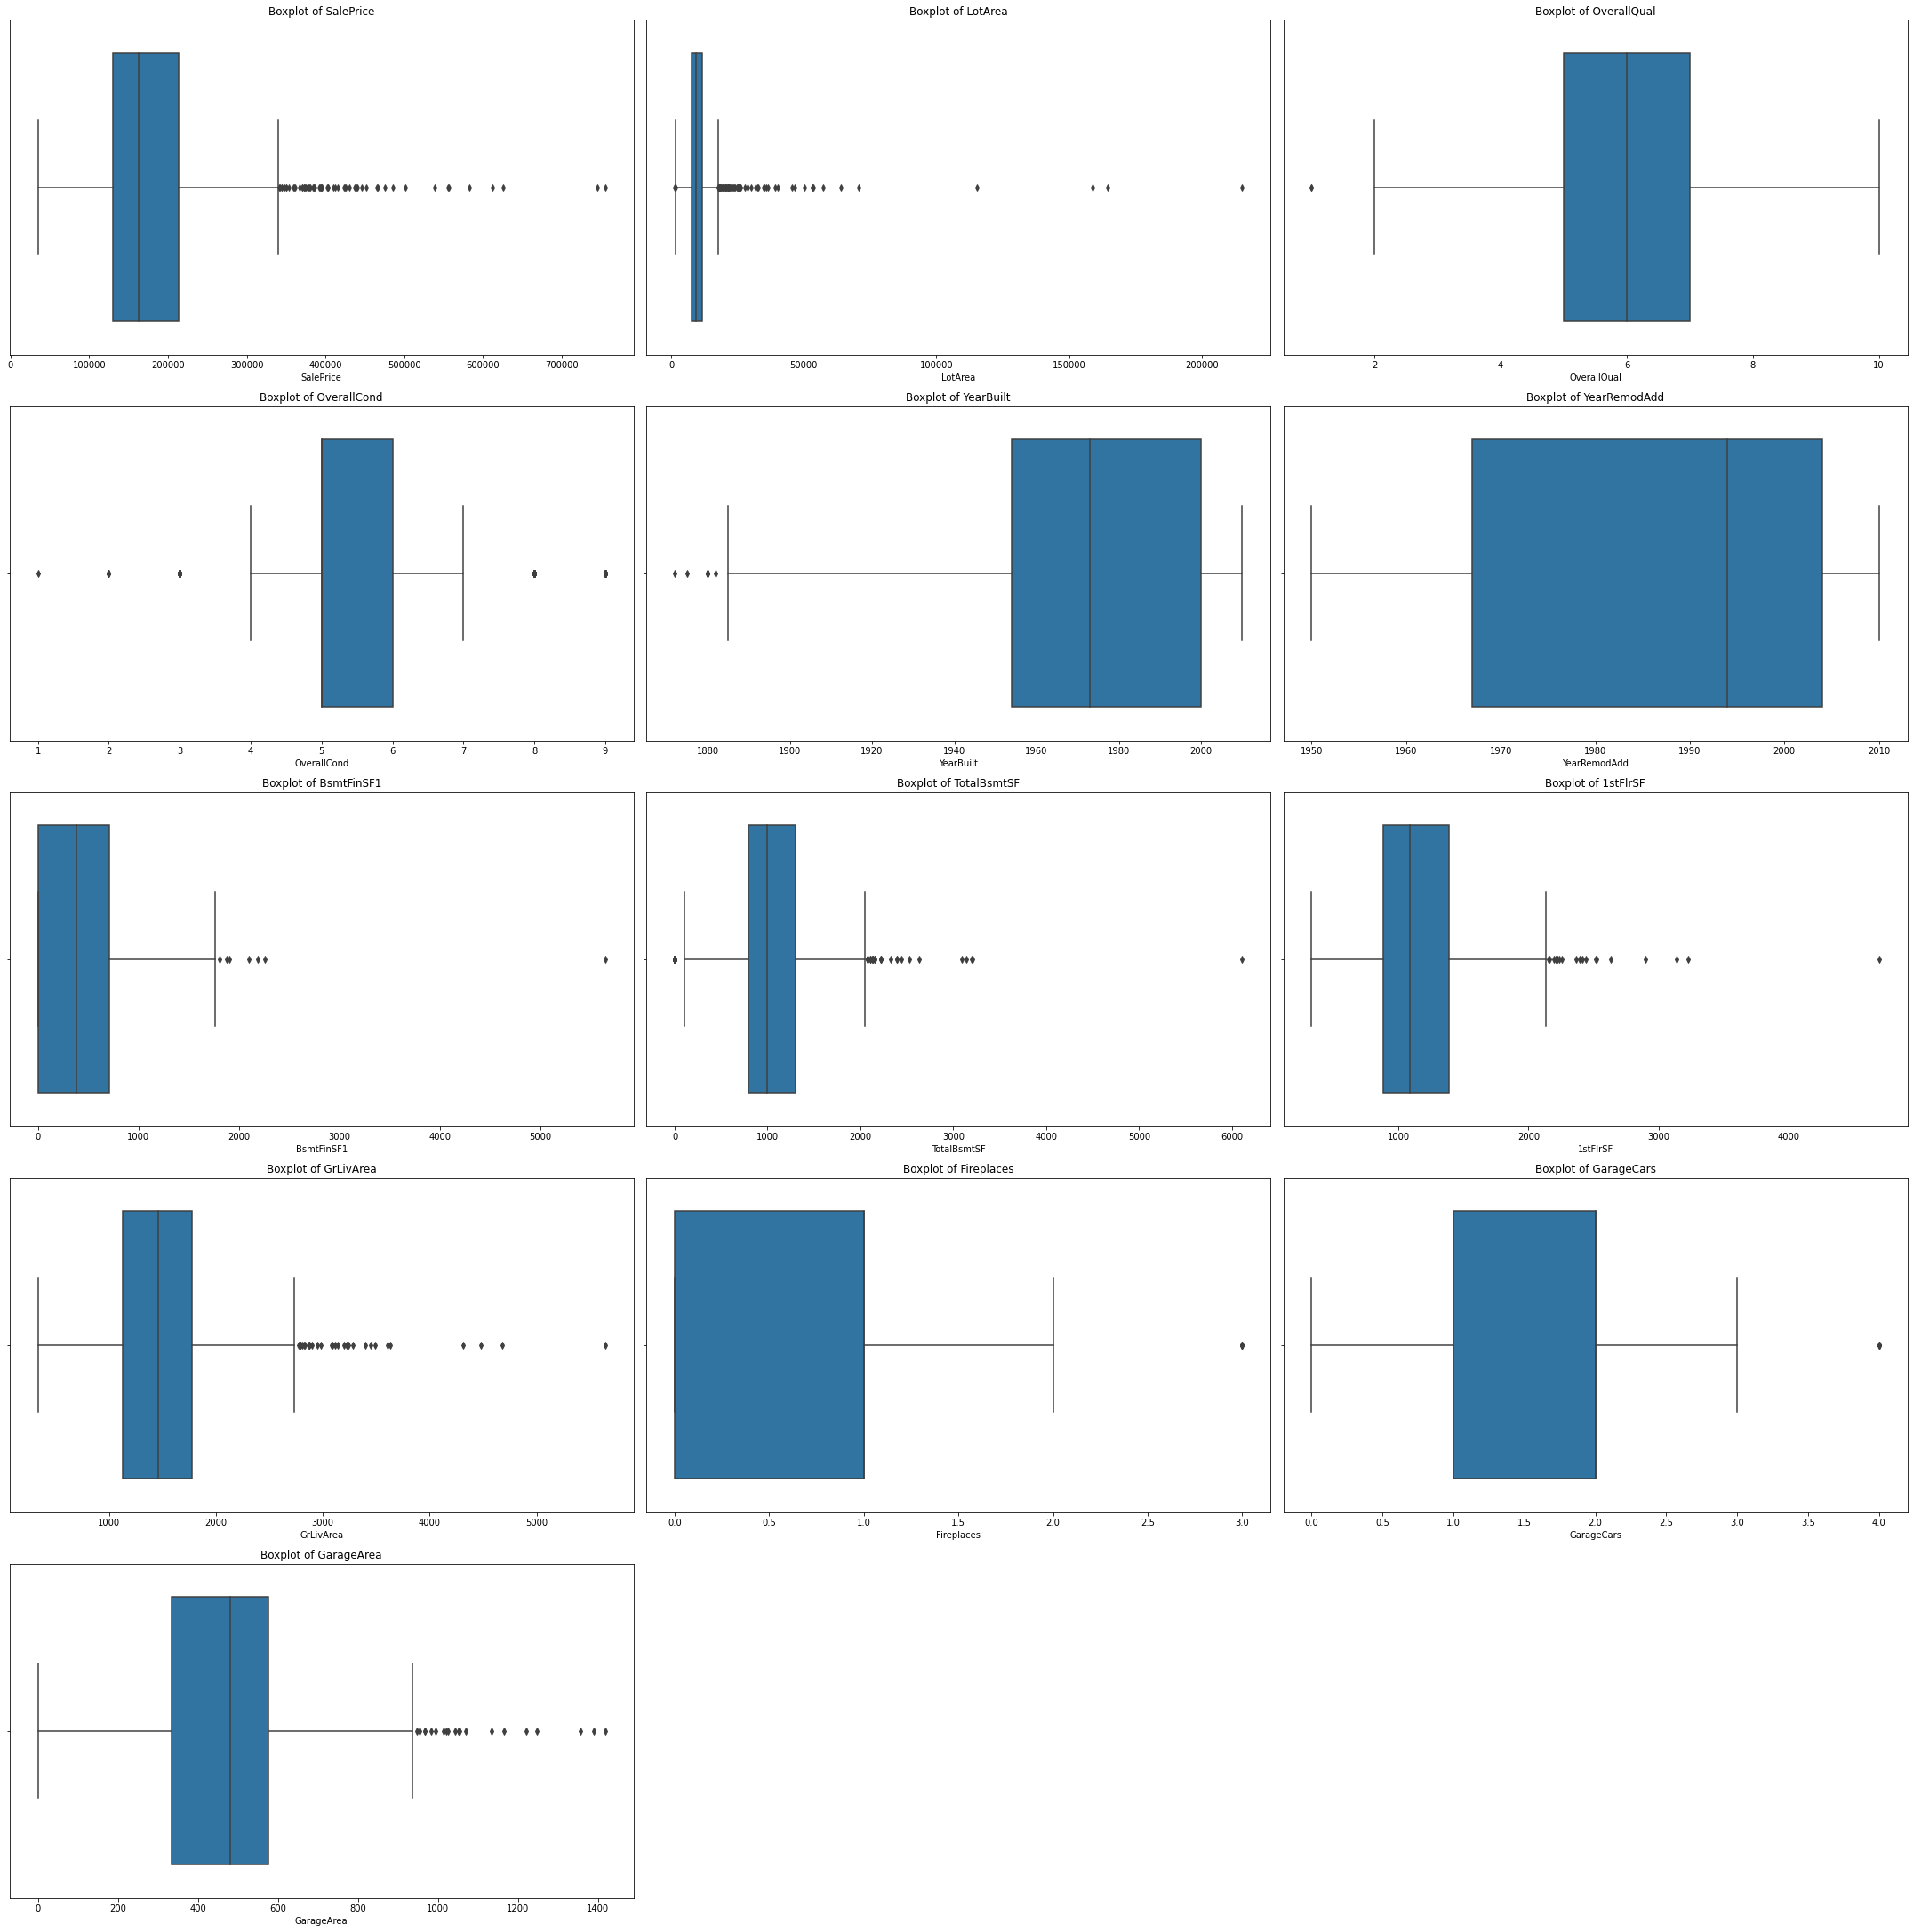

In [ ]:
# Make box plots to visually detect outliers

plt.figure(figsize=(30,60))

for index, column in enumerate(numeric_data):
    plt.subplot(10,3,index+1)
    sns.boxplot(df_1[column])
    plt.title("Boxplot of {}".format(column))
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

**Treating Outliers**

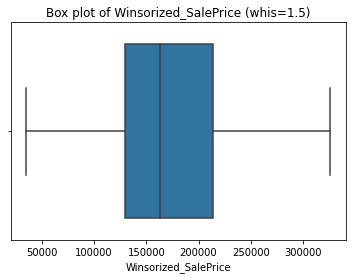

In [ ]:
from scipy.stats.mstats import winsorize

# Apply one-way and two-way winsorization to the highest and both the highest and lowest ends
# of the value distribution. Because we have a lot of extreme
# values, set the values of the outliers to the 
# value of the ninetieth percentile.

df_1["Winsorized_SalePrice"] = winsorize(df_1["SalePrice"], (0,0.05))

# Plot a boxplot of the winsorized variable

sns.boxplot(df_1["Winsorized_SalePrice"])
plt.title("Box plot of Winsorized_SalePrice (whis=1.5)")
plt.show()

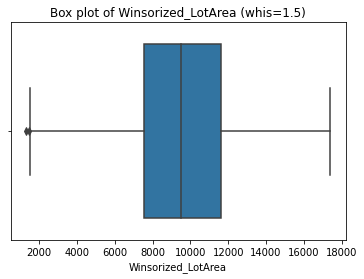

In [ ]:
df_1["Winsorized_LotArea"] = winsorize(df_1["LotArea"], (0,0.05))

# Plot a boxplot of the winsorized variable

sns.boxplot(df_1["Winsorized_LotArea"])
plt.title("Box plot of Winsorized_LotArea (whis=1.5)")
plt.show()

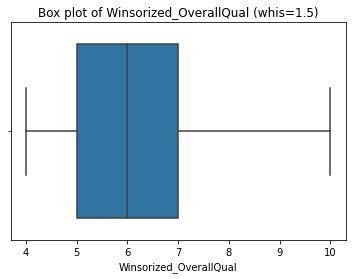

In [ ]:
df_1["Winsorized_OverallQual"] = winsorize(df_1["OverallQual"], (0.05,0))

# Plot a boxplot of the winsorized variable

sns.boxplot(df_1["Winsorized_OverallQual"])
plt.title("Box plot of Winsorized_OverallQual (whis=1.5)")
plt.show()

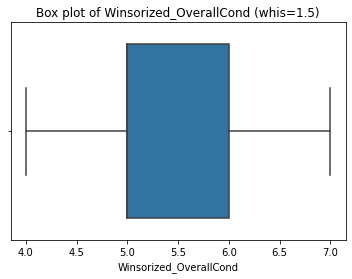

In [ ]:
df_1["Winsorized_OverallCond"] = winsorize(df_1["OverallCond"], (0.05,0.1))

# Plot a boxplot of the winsorized variable

sns.boxplot(df_1["Winsorized_OverallCond"])
plt.title("Box plot of Winsorized_OverallCond (whis=1.5)")
plt.show()

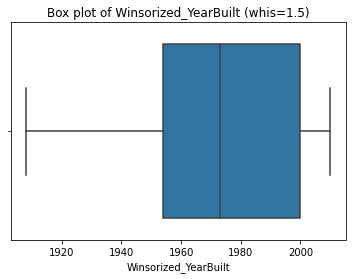

In [ ]:
df_1["Winsorized_YearBuilt"] = winsorize(df_1["YearBuilt"], (0.02,0))

# Plot a boxplot of the winsorized variable

sns.boxplot(df_1["Winsorized_YearBuilt"])
plt.title("Box plot of Winsorized_YearBuilt (whis=1.5)")
plt.show()

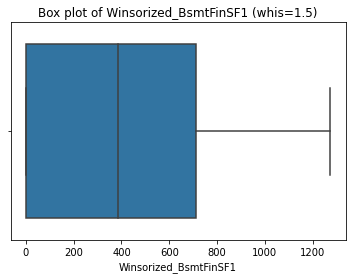

In [ ]:
df_1["Winsorized_BsmtFinSF1"] = winsorize(df_1["BsmtFinSF1"], (0,0.05))

# Plot a boxplot of the winsorized variable

sns.boxplot(df_1["Winsorized_BsmtFinSF1"])
plt.title("Box plot of Winsorized_BsmtFinSF1 (whis=1.5)")
plt.show()

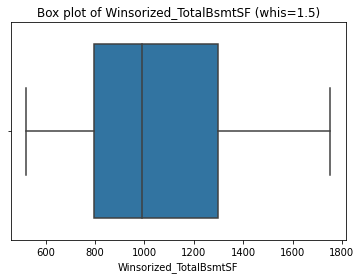

In [ ]:
df_1["Winsorized_TotalBsmtSF"] = winsorize(df_1["TotalBsmtSF"], (0.05,0.05))

# Plot a boxplot of the winsorized variable

sns.boxplot(df_1["Winsorized_TotalBsmtSF"])
plt.title("Box plot of Winsorized_TotalBsmtSF (whis=1.5)")
plt.show()

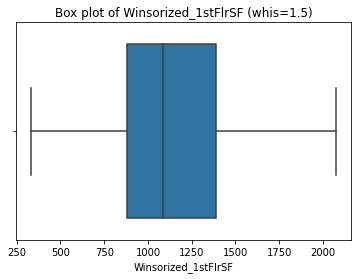

In [ ]:
df_1["Winsorized_1stFlrSF"] = winsorize(df_1["1stFlrSF"], (0,0.02))

# Plot a boxplot of the winsorized variable

sns.boxplot(df_1["Winsorized_1stFlrSF"])
plt.title("Box plot of Winsorized_1stFlrSF (whis=1.5)")
plt.show()

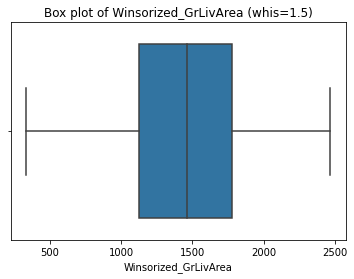

In [ ]:
df_1["Winsorized_GrLivArea"] = winsorize(df_1["GrLivArea"], (0,0.05))

# Plot a boxplot of the winsorized variable

sns.boxplot(df_1["Winsorized_GrLivArea"])
plt.title("Box plot of Winsorized_GrLivArea (whis=1.5)")
plt.show()

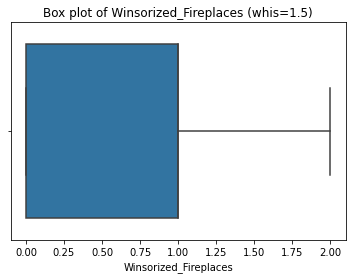

In [ ]:
df_1["Winsorized_Fireplaces"] = winsorize(df_1["Fireplaces"], (0,0.05))

# Plot a boxplot of the winsorized variable

sns.boxplot(df_1["Winsorized_Fireplaces"])
plt.title("Box plot of Winsorized_Fireplaces (whis=1.5)")
plt.show()

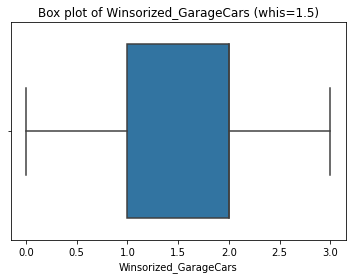

In [ ]:
df_1["Winsorized_GarageCars"] = winsorize(df_1["GarageCars"], (0,0.05))

# Plot a boxplot of the winsorized variable

sns.boxplot(df_1["Winsorized_GarageCars"])
plt.title("Box plot of Winsorized_GarageCars (whis=1.5)")
plt.show()

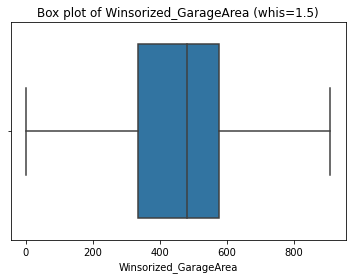

In [ ]:
df_1["Winsorized_GarageArea"] = winsorize(df_1["GarageArea"], (0,0.02))

# Plot a boxplot of the winsorized variable

sns.boxplot(df_1["Winsorized_GarageArea"])
plt.title("Box plot of Winsorized_GarageArea (whis=1.5)")
plt.show()

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   SalePrice               1460 non-null   int64 
 1   LotArea                 1460 non-null   int64 
 2   OverallQual             1460 non-null   int64 
 3   OverallCond             1460 non-null   int64 
 4   YearBuilt               1460 non-null   int64 
 5   YearRemodAdd            1460 non-null   int64 
 6   BsmtFinSF1              1460 non-null   int64 
 7   TotalBsmtSF             1460 non-null   int64 
 8   1stFlrSF                1460 non-null   int64 
 9   GrLivArea               1460 non-null   int64 
 10  Fireplaces              1460 non-null   int64 
 11  GarageCars              1460 non-null   int64 
 12  GarageArea              1460 non-null   int64 
 13  Neighborhood            1460 non-null   object
 14  ExterQual               1460 non-null   object
 15  Bsmt

In [ ]:
df_2 = df_1.drop(["SalePrice", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "Fireplaces", "GarageCars", "GarageArea"], axis=1)

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   YearRemodAdd            1460 non-null   int64 
 1   Neighborhood            1460 non-null   object
 2   ExterQual               1460 non-null   object
 3   BsmtQual                1460 non-null   object
 4   KitchenQual             1460 non-null   object
 5   GarageFinish            1460 non-null   object
 6   Foundation              1460 non-null   object
 7   HeatingQC               1460 non-null   object
 8   BsmtFinType1            1460 non-null   object
 9   MasVnrType              1460 non-null   object
 10  GarageType              1460 non-null   object
 11  Winsorized_SalePrice    1460 non-null   int64 
 12  Winsorized_LotArea      1460 non-null   int64 
 13  Winsorized_OverallQual  1460 non-null   int64 
 14  Winsorized_OverallCond  1460 non-null   int64 
 15  Wins

In [ ]:
# One-hot encoding

def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [ ]:
final_df = df_2.copy()

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   YearRemodAdd            1460 non-null   int64 
 1   Neighborhood            1460 non-null   object
 2   ExterQual               1460 non-null   object
 3   BsmtQual                1460 non-null   object
 4   KitchenQual             1460 non-null   object
 5   GarageFinish            1460 non-null   object
 6   Foundation              1460 non-null   object
 7   HeatingQC               1460 non-null   object
 8   BsmtFinType1            1460 non-null   object
 9   MasVnrType              1460 non-null   object
 10  GarageType              1460 non-null   object
 11  Winsorized_SalePrice    1460 non-null   int64 
 12  Winsorized_LotArea      1460 non-null   int64 
 13  Winsorized_OverallQual  1460 non-null   int64 
 14  Winsorized_OverallCond  1460 non-null   int64 
 15  Wins

In [ ]:
non_numeric_columns_1 = df_1.select_dtypes(['object']).columns

# Convert text values to dummy variables

final_df = category_onehot_multcols(non_numeric_columns_1)

print(final_df.shape)

Neighborhood
ExterQual
BsmtQual
KitchenQual
GarageFinish
Foundation
HeatingQC
BsmtFinType1
MasVnrType
GarageType
(1460, 70)


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   YearRemodAdd            1460 non-null   int64
 1   Winsorized_SalePrice    1460 non-null   int64
 2   Winsorized_LotArea      1460 non-null   int64
 3   Winsorized_OverallQual  1460 non-null   int64
 4   Winsorized_OverallCond  1460 non-null   int64
 5   Winsorized_YearBuilt    1460 non-null   int64
 6   Winsorized_BsmtFinSF1   1460 non-null   int64
 7   Winsorized_TotalBsmtSF  1460 non-null   int64
 8   Winsorized_1stFlrSF     1460 non-null   int64
 9   Winsorized_GrLivArea    1460 non-null   int64
 10  Winsorized_Fireplaces   1460 non-null   int64
 11  Winsorized_GarageCars   1460 non-null   int64
 12  Winsorized_GarageArea   1460 non-null   int64
 13  Blueste                 1460 non-null   uint8
 14  BrDale                  1460 non-null   uint8
 15  BrkSide              

In [ ]:
final_df.head()

,YearRemodAdd,Winsorized_SalePrice,Winsorized_LotArea,Winsorized_OverallQual,Winsorized_OverallCond,Winsorized_YearBuilt,Winsorized_BsmtFinSF1,Winsorized_TotalBsmtSF,Winsorized_1stFlrSF,Winsorized_GrLivArea,Winsorized_Fireplaces,Winsorized_GarageCars,Winsorized_GarageArea,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Fa,Gd,TA,Fa,Gd,TA,Fa,Gd,TA,RFn,Unf,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,Po,TA,BLQ,GLQ,LwQ,Rec,Unf,BrkFace,None,Stone,Attchd,Basment,BuiltIn,CarPort,Detchd
0,2003,208500,8450,7,5,2003,706,856,856,1710,0,2,548,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,1976,181500,9600,6,7,1976,978,1262,1262,1262,1,2,460,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,2002,223500,11250,7,5,2001,486,920,920,1786,1,2,608,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,1970,140000,9550,7,5,1915,216,756,961,1717,1,3,642,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,2000,250000,14260,8,5,2000,655,1145,1145,2198,1,3,836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0


**Lasso Regression**

In [ ]:
# Y is the target variable

Y = final_df['Winsorized_SalePrice']

# X is the feature set

X = final_df.drop(["Winsorized_SalePrice", "Winsorized_LotArea", "Winsorized_OverallCond"], axis=1)


# Split the data into train and test sets where 20% of the data 
# resides in the test set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [ ]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# Make predictions by calling the predict() function

y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in the training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 10.0
R-squared of the model in the training set is: 0.8974533252089681
-----Test set statistics-----
R-squared of the model in the test set is: 0.8803280126612676
Mean absolute error of the prediction is: 16528.06509513586
Mean squared error of the prediction is: 507169183.2956612
Root mean squared error of the prediction is: 22520.417032010337
Mean absolute percentage error of the prediction is: 10.311674240780514


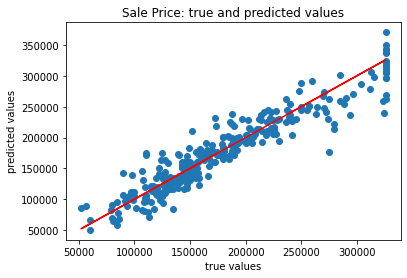

In [ ]:
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Sale Price: true and predicted values")
plt.show()

**Gradient Boosting Regression**

In [ ]:
# Train the model

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Make predictions by calling the predict() function

y_preds_train = gbr.predict(X_train)
y_preds_test = gbr.predict(X_test)

print("R-squared of the model in the training set is: {}".format(gbr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(gbr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.9465673637298658
-----Test set statistics-----
R-squared of the model in the test set is: 0.8958501320798992
Mean absolute error of the prediction is: 15447.529900693664
Mean squared error of the prediction is: 441386531.8696234
Root mean squared error of the prediction is: 21009.201124022384
Mean absolute percentage error of the prediction is: 9.595799524179581


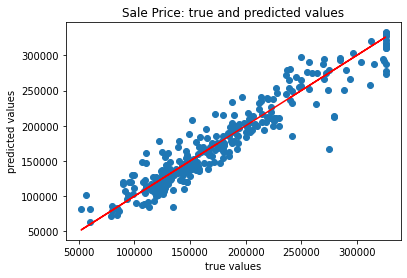

In [ ]:
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Sale Price: true and predicted values")
plt.show()

The R-squared of the model in the training and test sets are **0.9407** and **0.8956** respectively. However, this Gradient Boosting Regression model overfits since the difference between R-squred values is large.

**Finding best parameters for Gradient Boosting with sklearn's GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

estimator = GradientBoostingRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200],
    "subsample": [0.8, 1],
    "max_depth": [2, 3, 5] 

}

gbr = GridSearchCV(estimator, param_grid, cv=10)
gbr.fit(X_train, y_train)

print('Best parameters found by grid search are:', gbr.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
# Train the model

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate= 0.1, max_depth=3, n_estimators=200, subsample=0.8)
gbr.fit(X_train, y_train)

# Make predictions by calling the predict() function

y_preds_train = gbr.predict(X_train)
y_preds_test = gbr.predict(X_test)

print("R-squared of the model in the training set is: {}".format(gbr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(gbr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.9673824122362126
-----Test set statistics-----
R-squared of the model in the test set is: 0.9067715732599749
Mean absolute error of the prediction is: 14456.607244868948
Mean squared error of the prediction is: 395101527.9444157
Root mean squared error of the prediction is: 19877.160962884405
Mean absolute percentage error of the prediction is: 8.963944816669994


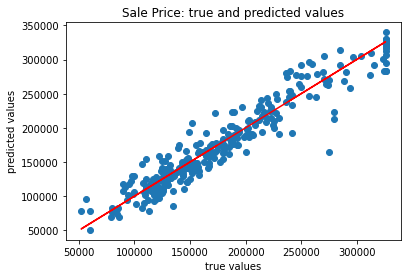

In [ ]:
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Sale Price: true and predicted values")
plt.show()

---

#**4. Results**

The numerical features with high feature importance score and at the same time are highly correlated with the Sale Price were selected: OverallQual, YearBuilt, YearRemodAdd, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLivArea, Fireplaces, GarageCars, GarageArea. 
The categorical features that exhibit high variance with respect to the Sale Price were selected: Neighborhood, ExterQual, BsmtQual, KitchenQual, GarageFinish, Foundation, HeatingQC, BsmtFinType1, MasVnrType, GarageType.
Based on the R-squared, MAE, MSE, and RMSE values Gradient Boosting solution is the top performer.


---

# **5. Discussion & Recomendations**

From this model, interested parties will be able to compare the sale price of a house with the appraiser’s estimation to avoid cancelled sales contract and transaction delays.

The model’s sale price value is based on comparable homes in the area since the increase or decrease in price is largely based on how a house compares to others in an area. Therefore, the model’s prediction is expected to be better than the appraisers. If interested parties notice large inconsistencies between both the model and appraiser estimations; they should bring them to the attention of the real estate agent and mortgage lender.

Moreover, this model could serve as concrete evidence that the appraisal is wrong. Without a solid case, lenders will not be likely to help. However, with concrete factual backup, a lender may be able to order a new appraisal, and may even have the ability to override the first home appraisal report.

After all, an appraisal is just the appraiser’s opinion; and this model could serve as a second appraiser or opinion for comparison purposes.

House prices can be affected by economic activity. Thus, as further analysis, it is recommended to measure and integrate the interest rates in the prediction at the time houses are sold. 

---

# **References**

1. https://cdn.nar.realtor/sites/default/files/documents/2020-10-realtors-confidence-index-11-19-2020.pdf

2. https://www.nar.realtor/